In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_thc_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',
 'tfidf_7

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['X..Delta9-THC'], axis = 1)
y = df_rf[['X..Delta9-THC']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.25971245],
       [0.25971245],
       [0.25971245],
       ...,
       [0.56255736],
       [0.56255736],
       [0.56255736]])

<AxesSubplot:ylabel='Count'>

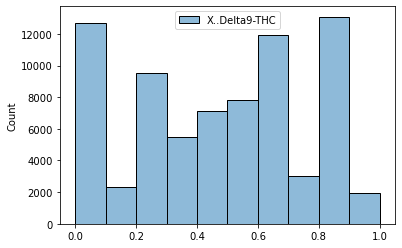

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_7013/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.058546765248321135

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.012392023318844776

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11131946513905273

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9645485716988268

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.8498455971026371

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,tfidf_0,0.000857
1,tfidf_1,0.000898
2,tfidf_2,0.000433
3,tfidf_3,0.000408
4,tfidf_4,0.001686
...,...,...
464,tree,0.000481
465,tropical,0.000937
466,vanilla,0.004828
467,violet,0.000140


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
433,diesel,2.832516e-02
390,sativa,2.797008e-02
329,tfidf_329,1.950504e-02
447,orange,1.869393e-02
285,tfidf_285,1.609934e-02
168,tfidf_168,1.557688e-02
121,tfidf_121,1.459099e-02
253,tfidf_253,1.326426e-02
345,tfidf_345,1.292524e-02
149,tfidf_149,1.287764e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([9.47708676e-04, 8.79250098e-04, 4.93398909e-04, 4.52654963e-04,
       1.70362077e-03, 2.58859684e-03, 1.39750032e-03, 5.16166319e-03,
       2.40364649e-04, 6.97370245e-03, 7.85130061e-04, 4.65415368e-03,
       5.89195581e-04, 1.44322328e-03, 2.62240809e-03, 2.09923060e-03,
       2.27456106e-03, 1.26980130e-03, 5.35011850e-04, 8.98750080e-03,
       2.33496265e-03, 5.12155573e-03, 1.11213974e-03, 6.15247331e-04,
       6.74689811e-03, 4.05770799e-04, 1.52279864e-03, 1.06246207e-03,
       1.39537436e-03, 4.04862262e-04, 3.63041483e-03, 6.91469766e-04,
       4.43408892e-03, 7.46579183e-04, 1.49100749e-03, 9.41025238e-04,
       2.38536385e-04, 7.81401109e-03, 4.60543379e-04, 6.73335860e-03,
       7.95325800e-04, 1.22014297e-03, 3.04324928e-04, 6.80706394e-03,
       3.95289675e-04, 1.12512776e-03, 1.88603650e-03, 2.15491721e-04,
       3.16001952e-03, 5.61213424e-04, 1.70654531e-03, 5.40527093e-04,
       9.05088984e-04, 4.50402397e-04, 1.58788305e-03, 4.80662259e-04,
      

In [23]:
selector.threshold_

0.0021321961620469083

In [24]:
mask = selector.get_support()

In [25]:
mask

array([False, False, False, False, False,  True, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_9,tfidf_11,tfidf_14,tfidf_16,tfidf_19,tfidf_20,tfidf_21,tfidf_24,...,citrus,diesel,earthy,grape,lemon,orange,pine,pungent,sweet,vanilla
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396758,...,0,0,0,0,0,0,0,0,0,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,1
3,0.145484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,1,0,0,1,0,0,0
4,0.145484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_thc.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_thc.pkl")

['selected_X_rf_tfidf_thc.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_7013/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05737045585210325

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.012067161159699248

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10985063113018172

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9594636265502688

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.8530773729156935

Hyperparameter Tuning

In [37]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/andalanp

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_tfidf_thc.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_thc.pkl")

['rscv_rf_tfidf_best_params_thc.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_7013/197028604.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06781239657563443

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.013793842958941612

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11744719221395467

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.939190830585193

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.8320543151537245

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_thc.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_thc.pkl")

['y_test_rfreg_tfidf_thc.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.06634701738733041

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.013429966928470111

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.1158877341588406

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.836797429378702

Error analysis

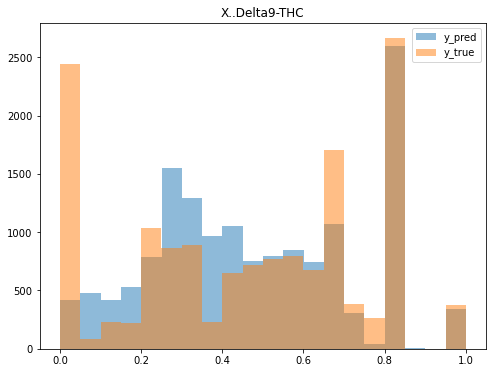

<Figure size 432x288 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Delta9-THC"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_thc.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.918
P-value: 0.000


<AxesSubplot:>

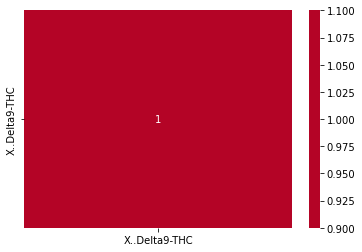

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)